In [2]:
import numpy as np
np.random.seed(0)
from scipy import signal
from scipy.io import wavfile
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA
from numpy.fft import rfft, rfftfreq, fft, fftfreq

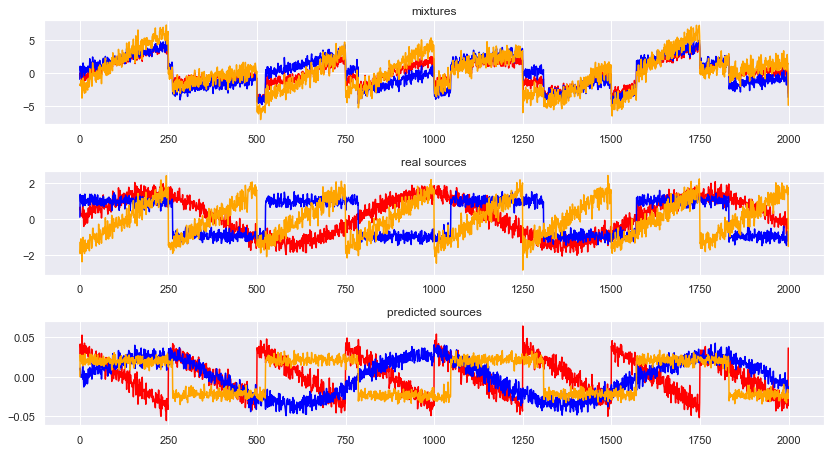

In [164]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)


S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)

ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

fig = plt.figure()
models = [X, S, S_]
names = ['mixtures', 'real sources', 'predicted sources']
colors = ['red', 'blue', 'orange']

for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(4, 1, i+1)
    plt.title(name)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
        
fig.tight_layout()        
plt.show()

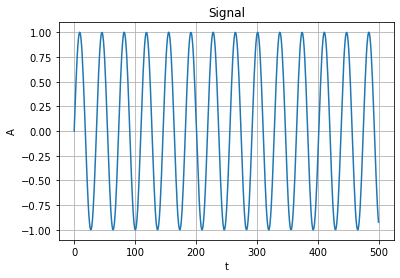

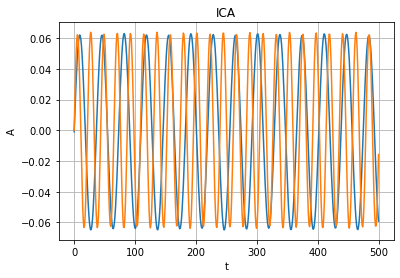

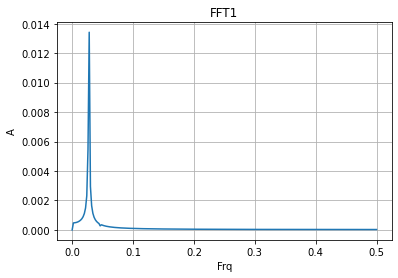

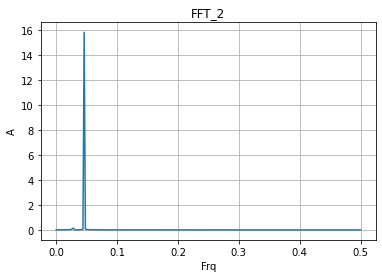

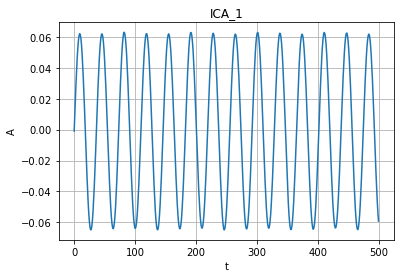

In [46]:
time = np.linspace(0,500,500)

a0= 1
a1= 0.02
ω0= 0.171986
ω1= 0.2885
alph = 0.00001

Sig1 = a0*np.sin(ω0*time)
Sig2 = a1*np.sin(ω1*time)
Sig = np.c_[Sig1,Sig2]

Sig1 = a0*np.sin(ω0*time)
Sig2 = a1*np.sin(ω1*time)
Sig3 = np.c_[Sig1,Sig2]


A = np.array([[1, 4],[0.5,1]])
Sig = np.dot(Sig, A.T)

Sig3 = np.dot(Sig3, A.T)

ica = FastICA(n_components=2)
SigICA = ica.fit_transform(Sig3)
SigICA1 = SigICA[:,0]
SigICA2 = SigICA[:,1]


spectr1 = rfft(SigICA1) #преобразование фурье
spectr2 = rfft(SigICA2)


fi = plt.figure()
plt.plot(time, Sig1) #график
plt.xlabel('t')
plt.ylabel('A')
plt.title('Signal')
plt.grid(True) #сетка
plt.show()
fi.savefig('Signal')

fi = plt.figure()
plt.plot(time, SigICA) #график
plt.xlabel('t')
plt.ylabel('A')
plt.title('ICA')
plt.grid(True) #сетка
plt.show()
fi.savefig('ICA')

fi = plt.figure()
plt.plot(rfftfreq(500, 1), np.abs(spectr1)/1024) #возвращает частоту в Гц
plt.xlabel('Frq')
plt.ylabel('A')
plt.title('FFT1')
plt.grid(True) #сетка
plt.show()
fi.savefig('FFT_1')

fi = plt.figure()
plt.plot(rfftfreq(500, 1),np.abs(spectr2)) #возвращает частоту в Гц
plt.xlabel('Frq')
plt.ylabel('A')
plt.title('FFT_2')
plt.grid(True) #сетка
plt.show()
fi.savefig('FFT_2')


fi = plt.figure()
plt.plot(time, SigICA1) #график
plt.xlabel('t')
plt.ylabel('A')
plt.title('ICA_1')
plt.grid(True) #сетка
plt.show()
fi.savefig('ICA_1')
